### Tic Tac Toe Intermediate boards optimal play (single label)

In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn import svm
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

data =  pd.read_csv('tictac_single.txt', sep=" ", header=None)
data.columns = ['x0','x1','x2','x3','x4','x5','x6','x7','x8','y']
print('The tic tac toe single label dataset is\n',data)
print('----------------------------------------------------------------------------')

col=data.columns.tolist()

#Label encoding
le = preprocessing.LabelEncoder()

#Transforming df
col = ['x0','x1','x2','x3','x4','x5','x6','x7','x8','y']
for i in range(len(col)):
    data[col[i]]=le.fit_transform(data[col[i]])
    
X = data.drop('y', axis = 1)
y = data['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.90, random_state=42, stratify=y)

#Linear SVM

clf = OneVsRestClassifier(SVC(kernel='linear',degree=1)).fit(X, y)
y_pred_svm = clf.predict(X_test)

print('Accuracy Score for linear SVM',accuracy_score(y_test,y_pred_svm))
print('Recall Score for linear SVM',recall_score(y_test,y_pred_svm,average='macro'))
print('Precision Score for linear SVM',precision_score(y_test,y_pred_svm,average='macro'))
print('F1 Score for linear SVM',f1_score(y_test,y_pred_svm,average='macro'))

conf_mat_svm = confusion_matrix(y_test, y_pred_svm)
print('Confusion matrix for linear SVM\n',conf_mat_svm)
#sns.heatmap(conf_mat, square=True, annot=True, cmap='Blues', fmt='d', cbar=False)

accuracies_clf = cross_val_score(estimator = clf, X = X_train, y = y_train, cv = 10)
print("Cross validation Accuracy score for linear SVM: {:.2f} %".format(accuracies_clf.mean()*100))
print("Cross validaton Standard Deviation score for linear SVM: {:.2f} %".format(accuracies_clf.std()*100))
print('----------------------------------------------------------------------------')

#SVM with kernel RBF

clf = OneVsRestClassifier(SVC(kernel='rbf',degree=1)).fit(X, y)
y_pred_svm = clf.predict(X_test)

print('Accuracy Score for RBF SVM',accuracy_score(y_test,y_pred_svm))
print('Recall Score for RBF SVM',recall_score(y_test,y_pred_svm,average='macro'))
print('Precision Score for RBF SVM',precision_score(y_test,y_pred_svm,average='macro'))
print('F1 Score for RBF SVM',f1_score(y_test,y_pred_svm,average='macro'))

conf_mat_svm = confusion_matrix(y_test, y_pred_svm)
print('Confusion matrix for RBF SVM\n',conf_mat_svm)
#sns.heatmap(conf_mat, square=True, annot=True, cmap='Blues', fmt='d', cbar=False)

accuracies_clf = cross_val_score(estimator = clf, X = X_train, y = y_train, cv = 10)
print("Cross validation Accuracy score for RBF SVM: {:.2f} %".format(accuracies_clf.mean()*100))
print("Cross validaton Standard Deviation score for RBF SVM: {:.2f} %".format(accuracies_clf.std()*100))
print('----------------------------------------------------------------------------')


#KNN

knn = make_pipeline(KNeighborsClassifier(n_neighbors=3))
knn.fit(X_train, y_train)
y_pred_knn=knn.predict(X_test)

print('Accuracy Score for KNN',accuracy_score(y_test,y_pred_knn))
print('Recall Score for KNN',recall_score(y_test,y_pred_knn,average='macro'))
print('Precision Score for KNN',precision_score(y_test,y_pred_knn,average='macro'))
print('F1 Score for KNN',f1_score(y_test,y_pred_knn,average='macro'))

conf_mat_knn = confusion_matrix(y_test, y_pred_knn)
print('Confusion matrix for KNN\n',conf_mat_knn)
#sns.heatmap(conf_mat, square=True, annot=True, cmap='Blues', fmt='d', cbar=False)

accuracies_knn = cross_val_score(estimator = knn, X = X_train, y = y_train, cv = 10)
print("Cross validation Accuracy score for KNN: {:.2f} %".format(accuracies_knn.mean()*100))
print("Cross validaton Standard Deviation score for KNN: {:.2f} %".format(accuracies_knn.std()*100))
print('----------------------------------------------------------------------------')

#MLP
mlp = make_pipeline(MLPClassifier(hidden_layer_sizes=(2000,1000,500,100,50,), max_iter=200, tol=0.5))
mlp.fit(X_train, y_train)
y_pred_mlp = mlp.predict(X_test)

print('Accuracy Score for MLP',accuracy_score(y_test,y_pred_mlp))
print('Recall Score for MLP',recall_score(y_test,y_pred_mlp,average='macro'))
print('Precision Score for MLP',precision_score(y_test,y_pred_mlp,average='macro'))
print('F1 Score for MLP',f1_score(y_test,y_pred_mlp,average='macro'))

conf_mat_mlp = confusion_matrix(y_test, y_pred_mlp)
print('Confusion matrix for MLP\n',conf_mat_mlp)
#sns.heatmap(conf_mat, square=True, annot=True, cmap='Blues', fmt='d', cbar=False)

accuracies_mlp = cross_val_score(estimator = mlp, X = X_train, y = y_train, cv = 10)
print("Cross validation Accuracy score for MLP: {:.2f} %".format(accuracies_mlp.mean()*100))
print("Cross validaton Standard Deviation score for MLP: {:.2f} %".format(accuracies_mlp.std()*100))
print('----------------------------------------------------------------------------')

The tic tac toe single label dataset is
       x0  x1  x2  x3  x4  x5  x6  x7  x8  y
0      1  -1   0   0   0   0   0   1   0  6
1      1   0   1   0   0   0   0  -1   0  1
2      0   0   0   0   0   1   0   0   0  2
3      0   1   1   0   0   0   0  -1   0  0
4      1   1  -1   0   0   0   0  -1   0  3
...   ..  ..  ..  ..  ..  ..  ..  ..  .. ..
6546  -1   0   1   1   1  -1   0   0   0  6
6547   1   0   1  -1   1   1  -1   0  -1  7
6548  -1  -1   0   1   0   0   1   1   0  2
6549   0   1   1  -1  -1   1   0   1  -1  0
6550   1   1  -1   1   0   1  -1  -1   0  4

[6551 rows x 10 columns]
----------------------------------------------------------------------------
Accuracy Score for linear SVM 0.13721166892808684
Recall Score for linear SVM 0.13491477816369174
Precision Score for linear SVM 0.14117522676162536
F1 Score for linear SVM 0.11355346707689908
Confusion matrix for linear SVM
 [[ 61 238 173 289 299 127   8 137  76]
 [ 31 191  95 124 164  39   0  80  36]
 [ 25 160 135 149 210  6

C:\Users\sjalu\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Cross validation Accuracy score for MLP: 52.05 %
Cross validaton Standard Deviation score for MLP: 4.79 %
----------------------------------------------------------------------------


In [11]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.svm import SVC
from sklearn import svm
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import cross_val_score

In [2]:
data =  pd.read_csv('tictac_single.txt', sep=" ", header=None)
data.columns = ['x0','x1','x2','x3','x4','x5','x6','x7','x8','y']
print(data)

      x0  x1  x2  x3  x4  x5  x6  x7  x8  y
0      1  -1   0   0   0   0   0   1   0  6
1      1   0   1   0   0   0   0  -1   0  1
2      0   0   0   0   0   1   0   0   0  2
3      0   1   1   0   0   0   0  -1   0  0
4      1   1  -1   0   0   0   0  -1   0  3
...   ..  ..  ..  ..  ..  ..  ..  ..  .. ..
6546  -1   0   1   1   1  -1   0   0   0  6
6547   1   0   1  -1   1   1  -1   0  -1  7
6548  -1  -1   0   1   0   0   1   1   0  2
6549   0   1   1  -1  -1   1   0   1  -1  0
6550   1   1  -1   1   0   1  -1  -1   0  4

[6551 rows x 10 columns]


In [3]:
col=data.columns.tolist()
print(col)

['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'y']


In [4]:
#Label encoding
le = preprocessing.LabelEncoder()

#Transforming df
col = ['x0','x1','x2','x3','x4','x5','x6','x7','x8','y']
for i in range(len(col)):
    data[col[i]]=le.fit_transform(data[col[i]])
    
data

,x0,x1,x2,x3,x4,x5,x6,x7,x8,y
0,2,0,1,1,1,1,1,2,1,6
1,2,1,2,1,1,1,1,0,1,1
2,1,1,1,1,1,2,1,1,1,2
3,1,2,2,1,1,1,1,0,1,0
4,2,2,0,1,1,1,1,0,1,3
...,...,...,...,...,...,...,...,...,...,...
6546,0,1,2,2,2,0,1,1,1,6
6547,2,1,2,0,2,2,0,1,0,7
6548,0,0,1,2,1,1,2,2,1,2
6549,1,2,2,0,0,2,1,2,0,0


In [5]:
X = data.drop('y', axis = 1)
y = data['y']

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

In [7]:
y_test.unique()

array([0, 2, 1, 3, 6, 8, 5, 4, 7], dtype=int64)

In [8]:
X_train.shape

(5240, 9)

In [9]:
X_test.shape

(1311, 9)

#### Linear SVM

Accuracy Score:  0.13272311212814644
Recall Score:  0.12994672339561428
Precision Score:  0.14800970616536427
F1 Score:  0.11176680021524962


<AxesSubplot:>

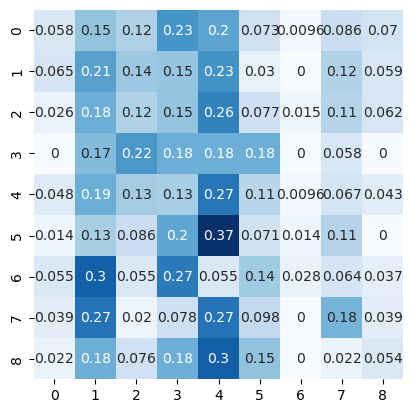

In [11]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
clf = OneVsRestClassifier(SVC(kernel='linear',degree=1)).fit(X, y)
y_pred=clf.predict(X_test)

print('Accuracy Score: ',accuracy_score(y_test,y_pred))
print('Recall Score: ',recall_score(y_test,y_pred,average='macro'))
print('Precision Score: ',precision_score(y_test,y_pred,average='macro'))
print('F1 Score: ', f1_score(y_test,y_pred,average='macro'))

conf_mat = confusion_matrix(y_test, y_pred, normalize='true')
sns.heatmap(conf_mat, square=True, annot=True, cmap='Blues',cbar=False)

In [12]:
accuracies_clf = cross_val_score(estimator = clf, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies_clf.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies_clf.std()*100))

Accuracy: 13.07 %
Standard Deviation: 1.86 %


# SVM RBF

Accuracy Score for RBF SVM 0.8756674294431731
Recall Score for RBF SVM 0.867367331998403
Precision Score for RBF SVM 0.8787959525931723
F1 Score for RBF SVM 0.8710920063483968
Confusion matrix for RBF SVM
 [[0.92332268 0.00638978 0.01277955 0.00638978 0.02555911 0.00638978
  0.00958466 0.00958466 0.        ]
 [0.0295858  0.75739645 0.0591716  0.03550296 0.04733728 0.01775148
  0.0295858  0.         0.02366864]
 [0.03076923 0.02051282 0.86666667 0.02051282 0.04615385 0.00512821
  0.         0.         0.01025641]
 [0.08737864 0.01941748 0.         0.73786408 0.08737864 0.
  0.00970874 0.00970874 0.04854369]
 [0.03827751 0.00478469 0.         0.00478469 0.94258373 0.00478469
  0.         0.         0.00478469]
 [0.02857143 0.         0.         0.         0.04285714 0.87142857
  0.01428571 0.01428571 0.02857143]
 [0.08256881 0.         0.         0.01834862 0.00917431 0.
  0.88990826 0.         0.        ]
 [0.03921569 0.01960784 0.         0.         0.01960784 0.03921569
  0.         0

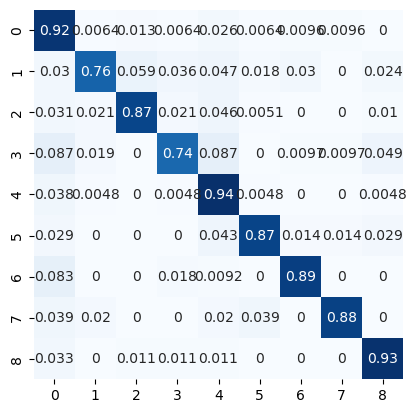

In [13]:
#SVM with kernel RBF

clf = OneVsRestClassifier(SVC(kernel='rbf',degree=1)).fit(X, y)
y_pred_svm = clf.predict(X_test)

print('Accuracy Score for RBF SVM',accuracy_score(y_test,y_pred_svm))
print('Recall Score for RBF SVM',recall_score(y_test,y_pred_svm,average='macro'))
print('Precision Score for RBF SVM',precision_score(y_test,y_pred_svm,average='macro'))
print('F1 Score for RBF SVM',f1_score(y_test,y_pred_svm,average='macro'))

conf_mat_svm = confusion_matrix(y_test, y_pred_svm, normalize='true')
print('Confusion matrix for RBF SVM\n',conf_mat_svm)
sns.heatmap(conf_mat_svm, square=True, annot=True, cmap='Blues', cbar=False)

accuracies_clf = cross_val_score(estimator = clf, X = X_train, y = y_train, cv = 10)
print("Cross validation Accuracy score for RBF SVM: {:.2f} %".format(accuracies_clf.mean()*100))
print("Cross validaton Standard Deviation score for RBF SVM: {:.2f} %".format(accuracies_clf.std()*100))
print('----------------------------------------------------------------------------')

#### RF

In [12]:
rf = RandomForestClassifier(n_estimators=500, max_depth=30, random_state=15)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=30, n_estimators=500, random_state=15)

In [13]:
y_pred = rf.predict(X_test)
y_pred

array([0, 2, 2, ..., 6, 0, 0], dtype=int64)

Accuracy Score:  0.9382151029748284
Recall Score:  0.9218937489877158
Precision Score:  0.9396217557747671
F1 Score:  0.9301088895893259


<AxesSubplot:>

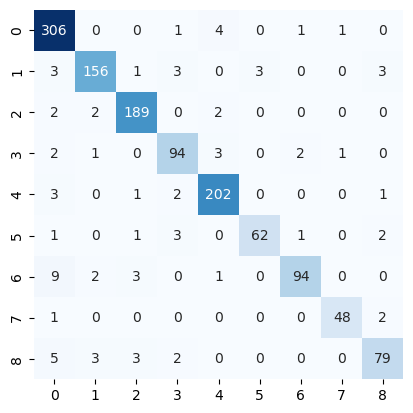

In [14]:
print('Accuracy Score: ',accuracy_score(y_test,y_pred))
print('Recall Score: ',recall_score(y_test,y_pred,average='macro'))
print('Precision Score: ',precision_score(y_test,y_pred,average='macro'))
print('F1 Score: ', f1_score(y_test,y_pred,average='macro'))

conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, square=True, annot=True, cmap='Blues', fmt='d', cbar=False)

In [ ]:
accuracies_rf = cross_val_score(estimator = rf, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies_rf.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies_rf.std()*100))

#### KNN

In [13]:
knn = make_pipeline(KNeighborsClassifier(n_neighbors=3))
knn.fit(X_train, y_train)

y_pred_knn=knn.predict(X_test)
y_pred_knn

array([0, 2, 2, ..., 6, 0, 0], dtype=int64)

Accuracy Score:  0.7475209763539283
Recall Score:  0.7085661627069388
Precision Score:  0.7515188105798007
F1 Score:  0.7265104405927444


<AxesSubplot:>

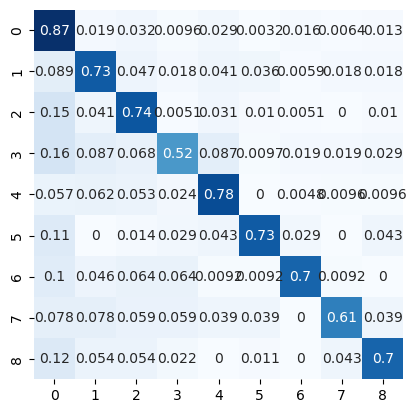

In [14]:
print('Accuracy Score: ',accuracy_score(y_test,y_pred_knn))
print('Recall Score: ',recall_score(y_test,y_pred_knn,average='macro'))
print('Precision Score: ',precision_score(y_test,y_pred_knn,average='macro'))
print('F1 Score: ', f1_score(y_test,y_pred_knn,average='macro'))

conf_mat = confusion_matrix(y_test, y_pred_knn, normalize='true')
sns.heatmap(conf_mat, square=True, annot=True, cmap='Blues', cbar=False)

In [15]:
accuracies_knn = cross_val_score(estimator = knn, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies_knn.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies_knn.std()*100))

Accuracy: 74.58 %
Standard Deviation: 1.72 %


#### MLP

In [19]:
mlp = make_pipeline(MLPClassifier(hidden_layer_sizes=(2000,1000,500,100,50,), max_iter=200, tol=0.5))
mlp.fit(X_train, y_train)

y_pred_mlp = mlp.predict(X_test)
y_pred_mlp

array([0, 6, 2, ..., 6, 0, 0], dtype=int64)

Accuracy Score:  0.8489702517162472
Recall Score:  0.8120273215824084
Precision Score:  0.8632896677551414
F1 Score:  0.8243794559640492


<AxesSubplot:>

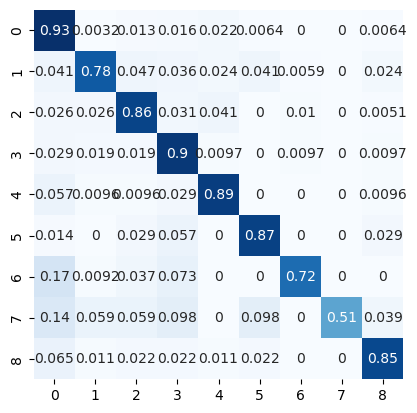

In [20]:
print('Accuracy Score: ',accuracy_score(y_test,y_pred_mlp))
print('Recall Score: ',recall_score(y_test,y_pred_mlp,average='macro'))
print('Precision Score: ',precision_score(y_test,y_pred_mlp,average='macro'))
print('F1 Score: ', f1_score(y_test,y_pred_mlp,average='macro'))

conf_mat = confusion_matrix(y_test, y_pred_mlp, normalize='true')
sns.heatmap(conf_mat, square=True, annot=True, cmap='Blues', cbar=False)

In [ ]:
accuracies_mlp = cross_val_score(estimator = mlp, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies_mlp.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies_mlp.std()*100))